## Challenge: Model Comparison
In this notebook I will take a data seet and compare the KNN regression with an OLS regression to spot the difference between the two.

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
%matplotlib inline

In [3]:
#data import
da = pd.read_csv(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\2.4.2 drill data\table8.csv')
da.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0,NaN
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0,NaN
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0,NaN
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN,NaN


In [4]:
da.fillna(value=0)
da = da[0:348]

In [5]:
dp = pd.DataFrame()
dp['Population'] = da[['Population']]
dp['Violent_Crime'] = da[['Violent\ncrime']]
dp['Murder'] = da[['Murder and\nnonnegligent\nmanslaughter']]
dp['Rape'] = da[['Rape\n(legacy\ndefinition)2']]
dp['Robbery'] = da[['Robbery']]
dp['Burglary'] = da[['Burglary']]
dp['Aggravated_Assault'] = da[['Aggravated\nassault']]
dp['Larceny_Theft'] = da[['Larceny-\ntheft']]
dp['Motor_Vehicle_Theft'] = da[['Motor\nvehicle\ntheft']]
dp['Arson'] = da[['Arson3']]
dp['Property_Crime'] = da[['Property\ncrime']]
dp.head()

,Population,Violent_Crime,Murder,Rape,Robbery,Burglary,Aggravated_Assault,Larceny_Theft,Motor_Vehicle_Theft,Arson,Property_Crime
0,"1,861",0,0.0,0,0,2,0,10,0,0.0,12
1,"2,577",3,0.0,0,0,3,3,20,1,0.0,24
2,"2,846",3,0.0,0,0,1,3,15,0,0.0,16
3,"97,956",791,8.0,30,227,705,526,"3,243",142,NaN,"4,090"
4,"6,388",23,0.0,3,4,53,16,165,5,NaN,223


In [6]:
#looking at the new dataframe, some of the columns are not in the same in the
#format we want. Let's get rid of unnecessary characters, replace the nans 
#with 0s and convert strings to integers 
dp['Arson'] = dp['Arson'].astype(str)
dp['Population'] = dp.Population.str.replace(',','')
dp['Violent_Crime'] = dp.Violent_Crime.str.replace(',','')
dp['Rape'] = dp.Rape.str.replace(',','')
dp['Robbery'] = dp.Robbery.str.replace(',','')
dp['Burglary'] = dp.Burglary.str.replace(',','')
dp['Aggravated_Assault'] = dp.Aggravated_Assault.str.replace(',','')
dp['Larceny_Theft'] = dp.Larceny_Theft.str.replace(',','')
dp['Motor_Vehicle_Theft'] = dp.Motor_Vehicle_Theft.str.replace(',','')
dp['Arson'] = dp.Arson.str.replace('nan','0')
dp['Property_Crime'] = dp.Property_Crime.str.replace(',','')

In [7]:
dp['Population'] = pd.to_numeric(dp['Population'])
dp['Violent_Crime'] = pd.to_numeric(dp['Violent_Crime'])
dp['Rape'] = pd.to_numeric(dp['Rape'])
dp['Robbery'] = pd.to_numeric(dp['Robbery'])
dp['Burglary'] = pd.to_numeric(dp['Burglary'])
dp['Aggravated_Assault'] = pd.to_numeric(dp['Aggravated_Assault'])
dp['Larceny_Theft'] = pd.to_numeric(dp['Larceny_Theft'])
dp['Motor_Vehicle_Theft'] = pd.to_numeric(dp['Motor_Vehicle_Theft'])
dp['Arson'] = pd.to_numeric(dp['Arson'])
dp['Property_Crime'] = pd.to_numeric(dp['Property_Crime'])

In [8]:
dp = dp.drop([216])
dp = dp.drop([346])


Coefficients: 
 [[  1.40717019e-02  -6.11237024e+01   9.40812355e+01   6.58999784e+01
    6.05462881e+01]]

Intercept: 
 [ 9.03688234]

R-squared:
0.724280727923


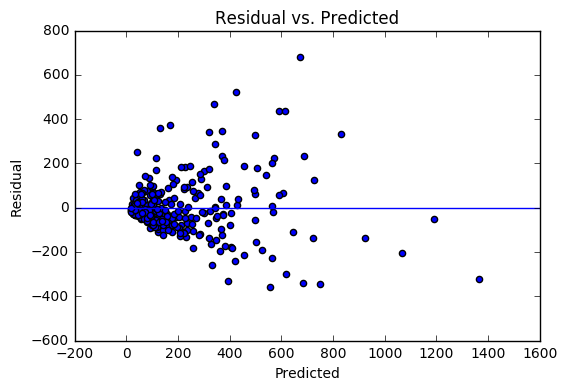

In [9]:
ds = dp[dp['Population'] < 40000]
ds = ds.drop(['Burglary'], axis=1)
ds = ds.drop(['Larceny_Theft'], axis=1)
ds = ds.drop(['Motor_Vehicle_Theft'], axis=1)
regr = linear_model.LinearRegression()
Y = ds['Property_Crime'].values.reshape(-1, 1)
X = ds[['Population', 'Violent_Crime', 'Rape', 'Robbery', 'Aggravated_Assault']]
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

predicted = regr.predict(X).ravel()
actual = ds['Property_Crime']
residual = actual - predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [10]:
#This r squared value is pretty bad so lets see if we can do any transformations
#The most obvious analysis is that violent crime, aggravated assault and robbery
#have above a 93% correlation. Since violent crime is the most correlated to
#the two other options, we are going to get rid of the other two
ds = ds.drop(['Robbery'], axis=1)
ds = ds.drop(['Aggravated_Assault'], axis=1)
ds['Violent_Crime2'] = ds['Violent_Crime']**.5
ds['Rape2'] = ds['Rape']**.5


Coefficients: 
 [[  1.04200734e-02   3.29520507e+01   5.34614333e+01]]

Intercept: 
 [-36.06448493]

R-squared:
0.748011944478


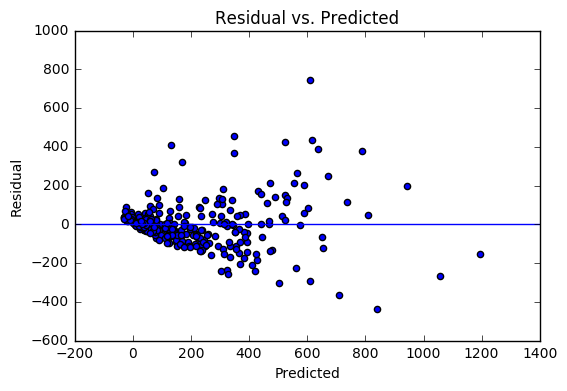

In [11]:
regr = linear_model.LinearRegression()
Y = ds['Property_Crime'].values.reshape(-1, 1)
X = ds[['Population', 'Violent_Crime2', 'Rape2']]
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

predicted = regr.predict(X).ravel()
actual = ds['Property_Crime']
residual = actual - predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [12]:
#now for the knn regression with 10 neighbors in both a weighted and unweighted environment
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
Y = ds[['Population', 'Violent_Crime2', 'Rape2']]
X = ds[['Property_Crime']].values.reshape(-1,1)
knn.fit(X, Y)

T = np.arange(0, 10000, 1)[:, np.newaxis]

Y_ = knn.predict(T)

knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X, Y)

T = np.arange(0, 20, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.58 (+/- 0.10)
Weighted Accuracy: 0.36 (+/- 0.22)


In [13]:
X = ds[['Population', 'Violent_Crime2', 'Rape2']]
y = ds['Property_Crime']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [15]:
X = xtrain
Y = ytrain
regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:', regr.score(X, Y))

Coefficients: 
 [  1.08270785e-02   2.98195250e+01   6.11033755e+01]
Intercept: 
 -36.1944958995

R-squared: 0.743925824218


In [16]:
X = xtest
Y = ytest
regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:', regr.score(X, Y))

Coefficients: 
 [  8.56150213e-03   4.52860070e+01   2.90043288e+01]
Intercept: 
 -36.3327236623

R-squared: 0.767897314151


In [20]:
X = xtrain
Y = ytrain
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(X)
knn.fit(X, Y)

knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(X)
knn_w.fit(X, Y)

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.53 (+/- 0.24)
Weighted Accuracy: 0.55 (+/- 0.24)


In [21]:
X = xtest
Y = ytest
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(X)
knn.fit(X, Y)

knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(X)
knn_w.fit(X, Y)

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.47 (+/- 0.28)
Weighted Accuracy: 0.47 (+/- 0.49)


Looking at the data, you can see that OLS outperformed KNN in all cases. Both models are bad for the data that I chose. If you look at the residual plots you can see that there is a reoccuring issue that is unfixable because there is a "fanning" at the end of the residual. No matter how many outliers you try to remove, there are always more, so these standard regressions will always fail to catch the end of the data or overfit to the sample set.

In terms of the actual regression types, linear regression is likely the best to be used when the data is a hand selected sample from a population that consists of a group an even distibution of points over one of the variables. The data does not necessarily have to be hand picked but it is important that one variable has an even distribution. Without doing this, there is almost always skewness in data that either causes an issue in linearity, residuals, or covariability. 

KNN regression is better used on data types with high skewness but clear outcomes. As you can see form the graphs, the KNN does jump a lot more inbetween points, meaning it is much better at predicting oscillations in data instead of going for a straight line. The issue is that KNN with high N neighbors will never predict outliers and when it is low, it will overfit to specific data, so you will need to try out different values based on your data and sample size.